## IMPORTANT = READ THESE INSTRUCTIONS CAREFULLY

In the exercises below your goal is to fill in the cells with code as described. Your functions should work on the samples provided **without modification.**


- **we** should be able to run your entire notebook by selecting Run->Run All Cells and **all** of your code will run without error within at most a few minutes
- if we have to modify your code so that it runs there will be a penalty - for example if you have indentations that cause code to fail there will be a penalty
- you are asked to produce many functions below - it would be wise to test these to make sure they work as you intend and without generating errors
- you should not use lists when you can use numpy arrays
- you should not use recursion when you don't have to and when it is inefficient (both in memory and time to execution) to use recursion
- once you have done your testing **you should be sure to remove**
    - any functions that are not needed in the code you are asked to provide
    - any variable assignments that are not needed in the code you are asked to provide
- make sure your code runs on examples does not contain infinite loops
- make sure the time it takes your code to run in examples is consistent with the complexity of the task being carried out
- do not put lines of code that excecute at the OS level. For example you should not have lines that install packages included in your code. Do all of your package installation outside of the notebook.
- when asked to write a function with some name, make sure you 
    - use the exact name asked for
    - use the exact arguments asked for
    - give the exact type of output asked for
- this notebook (and not some supporting pdf file) is the ultimate authority as to what output is asked for in a function
- functions you provide will be tested, so we'll be looking for functions with the exact name asked for. Make sure you only have **one version** in your notebook.

In [66]:
import numpy as np
import time
import requests
import pandas as pd

**Stochastic Differential Equations and their realizations**

Suppose we have a stochastic differential equation of the form
$$
dS_t = f(t,S_t) dt + g(t,S_t) dB_t
$$
with starting value $S_0$ given.  

Under (unstated) regularity conditions for the functions $f$ and $g$ we can generate approximate realizations $S_t$ for $t\in [0,T]$ as follows. Pick a large integer $N$ 
and define $\Delta=T/N.$ Then for regularly spaced points $0,T/N,2T/N,...,T$ 
our *Euler scheme* gives the values of $S_{i\Delta}$ for $i=0,\ldots,N$ iteratively:

Take $S_0$ as given, then, having defined $S_{i\Delta}$ take
$$
S_{(i+1)\Delta} = S_{i\Delta} + f(i\Delta,S_{i\Delta})\Delta
+g(i\Delta,S_{i\Delta})\delta_i\sqrt{\Delta}
$$
where the $\delta_i$ are iid $N(0,1)$ random variables.

At non grid points, we can define $S_t$ by linear interpolation.

**Standard Brownian Motion**

Note that we get standard Brownian motion as a special case by taking
$$ f\equiv 0$$
and
$$ g\equiv 1$$


**Brownian Motion with Drift**

More generally, if for some constants $\mu$ and $\sigma$ we take 
$$
f(x,t) = \mu
$$
$$
g(x,t) = \sigma 
$$
i.e. both functions are constant,
so that
$$
dS_t = \mu dt + \sigma dB_t
$$
we get a process referred to as Brownian motion with drift parameter $\mu$  and volatility parameter $\sigma.$


Note that if $\sigma=0$ we get a process without stochasticity
$$
dS_t = \mu dt
$$
with deterministic solution
$$
S_t = S_0 + \mu t
$$

hence, we might more precisely be referring to our process as Brownian motion with *linear* drift, and we could have more general drift terms, but the above is standard terminology. 

**Geometric Brownian Motion**

If we transform Brownian motion with drift by exponentiation i.e. by defining $G_t = \exp(S_t)$ (so that the updates are *multiplicative* rather than *additive*) we get what is referred to as 
**geometric Brownian motion** (with drift) a process often used in finance to model asset prices since it cannot become negative.

Ito's Lemma tells us that for this process
(I fixed a typo here and changed $dG_t$ to $dB_t$)
$$
dG_t = (\mu + \frac{1}{2} \sigma^2) G_t dt + \sigma G_t dB_t
$$
which can be written as 
$$
dG_t = \tilde{f}(t,G_t) dt + \tilde{g}(t,G_t) dG_t
$$
where 
$$
\tilde{f}(t,x) = (\mu  + \frac{1}{2} \sigma^2) x
$$
and
$$
\tilde{g}(t,x) = \sigma x
$$

**Problem 1:  Generate an SDE Realization**

Write a function called *GenerateSDERealization* that takes the following arguments:
- a starting value S0
- a function $f$ of two floating point variables that returns a single value floating point value
- a function $g$ of two floating point variables that returns a single value floating point value
- a positive number $T$
- a positive integer $N$

and which returns a 2-tuple containing two **numpy arrays**. 

- an array of values $0,\Delta,2\Delta,\ldots,T$ where $\Delta=T/N,$
- an array containing values $S_0=S0,S_\Delta,\ldots,S_T$ for a realization as described above.

Your code will allow you to generate realizations for various processes satisying the SDE

$$
dS_t = f(t,S_t) dt + g(t,S_t) dB_t
$$

by just changing the functions $f$ and $g$ and using them as arguments to our function.

**Notes**

- In your code, computing the square root of $\Delta$ in every iteration should be avoided
- You should work with numpy arrays throughout. Don't start with a list and append to it. That's slow.
- Allocate the numpy arrays you need outside of the loop.
- Generate your needed array of $N(0,1)$ random variables outside the loop instead of generating these one at a time inside a loop.

In [67]:
def GenerateSDERealization(S0,f,g,T,N):
    delta = T/N
    sqrt_delta = np.sqrt(delta)
    small_del_norms = np.random.normal(loc=0.0, scale=1.0, size=N+1)
    S_last = S0
    T_arr = np.empty(N+1)
    S_arr = np.empty(N+1)
    
    for i in range(N+1):
        T_arr[i] = i * delta
        S_arr[i] = S_last + (f(i*delta, S_last) * delta) + (g(i*delta, S_last) * small_del_norms[i] * sqrt_delta)
        S_last = S_arr[i]
        
    return (T_arr, S_arr)

**Plotting a realization**

You can test that plots of your realizations look reasonable using the code below. 

0.011960506439208984


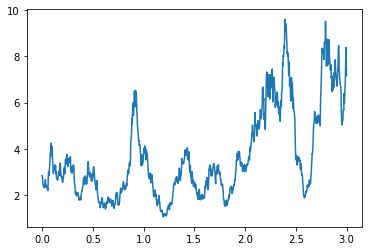

In [68]:
import matplotlib.pyplot as plt

start_time=time.time()
ntrials=1000
N=1000
T=3
mu=.01
sigma=.25
S0=1
G0=np.exp(S0)

def f(t,x):
    return(np.sin(t)*np.cos(x))
def g(t,x):
    return(1+.1*np.sin(t))

Tvec,Svec=GenerateSDERealization(S0,f,g,T,N)
Gvec=np.exp(Svec)
plt.plot(Tvec,Gvec)

end_time=time.time()
print(end_time-start_time)

**Testing Ito's Lemma: A Special Case**

As pointed out in the notes, we can define geometric Brownian motion in the interval $[0,\infty)$
with some specified value $G_0$ 
in two alterntaive ways:

- (method 1) Start with Brownian motion $B_t$ starting at 0 and transform it to get $G_t = G_0\exp\{\mu t + \sigma B_t\}$
(fixed a typo in the following)
- (method 2) Use the SDE representation $dG_t = (\mu + \frac{1}{2}\sigma^2) G_t dt + \sigma G_t dB_t$ starting at $G0$

where $\mu$ and $\sigma \geq 0$ are constants.

You should be able to generate realizations from each of the two methods by calling your **GenerateSDERealization** function in Problem 1, using appropriate arguments.

**Problem 2**

Write a function called **GBM2Versions** that takes as input 
- **G0** a starting value G0
- **mu**  a constant 
- **sigma** a (positive) constant 
- **T** a (positive) constant  
- **N** a (positive) integer

Your function should return a numpy array with $N+1$ rows and 3 columns. The 0th column should contain the time points $0,T/N,2T/N,...,T$ where the realizations are defined, The other two columns should contain realizations of geometric Brownian motion starting at $G_0$ in the time interval $[0,T]$ where $N$ is the number of intervals that the interval $[0,T]$ has been broken up into.

- The 1-th column should be generated using method 1
- The 2-th column should be generated using method 2

To produce the 1-th and 2-th columns of output, you should be using two separate calls to **GenerateSDERealization** with appropriate arguments.

**Important!!!** 

Do not include the code for GenerateSDERealization you created in Problem 1 in the cell below. You should be calling this function. (Oh and good idea to make sure you get that right.)**

Other than calling the GenerateSDERealization function and using the numpy package your code should be **self-contained.** In particular, do **not** define functions you use outside of the function you are asked for. These functions should be defined **inside** the GBM2Versions code.

If you concatenate numpy arrays, find a way to do it that does **not** use lists or loops and try to make it happen quickly.

In [69]:
def GBM2Versions(G0,mu,sigma,T,N):
    # For method 1: f and g are now const, thus the func args do not matter
    f1 = lambda xxx, yyy: mu
    g1 = lambda xxx, yyy: sigma
    
    # For method 2
    f2 = lambda xxx, G_last: (mu + 0.5 * sigma**2) * G_last
    g2 = lambda xxx, G_last: sigma * G_last
    
    GBM_mtx = np.zeros([N+1,3]) # 1st col = T_arr | 2nd col = G_arr_1 | 3rd col = G_arr_2
    # Method 1
    GBM_mtx[:,0] , Bt = GenerateSDERealization(0,f,g,T,N)
    GBM_mtx[:,1] = G0*np.exp(GBM_mtx[:,0] * mu + sigma * Bt)
        
    # Method 2
    _, GBM_mtx[:,2] = GenerateSDERealization(G0,f2,g2,T,N)
        
    return GBM_mtx

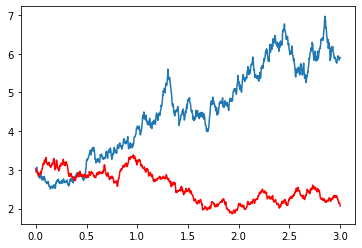

In [70]:
# Test
GBM_mtx = GBM2Versions(3,0.01,0.25,3,1000)

plt.plot(GBM_mtx[:,0],GBM_mtx[:,1])
plt.plot(GBM_mtx[:,0],GBM_mtx[:,2], "r")

**Problem 3 - Generating GBM at given time points (not necessarily equi-spaced)**

Recall that the increments for Brownian motion are independent and normally distributed, so we can generate realizations of Brownian motion at
any sequence of time points $t_0 < t_1 < \ldots < t_N$ without needing to use a *finer* grid of time points, and we create geometric Brownian motion 
realizations at a sequence of time points without the introduction of a finer time point grid.

Write a function called **GenerateGBMRealization** that takes as one arguments 

- **G0** a starting point for realizations of GBM
- **mu** the drift parameter
- **sigma** the volatility parameter
- **T** a 1-d numpy array of times in strictly increasing order with **T[0]=0** assumed

at which we want to generate a single realization of GBM process starting with value **G0** at time 0 and with parameters **mu** and **sigma** at at those times in the array **T**.

Your function should return 

- a numpy array that has two columns and number of rows equal to the number of entries in T.

**Additional requirements:**

The function should be self-contained, and you should only have to generate the realization that those specific time points. In other words, you should not have to discretize into tiny time increments.

You should generate Brownian motion with drift *then* exponentiate it rather than doing updates on a multiplicative scale.

You should generate any random variables using a single numpy function call outside of a loop.

In [71]:
def GenerateGBMRealization(G0,mu,sigma,T):
    small_del_norms = np.random.normal(loc=0.0, scale=1.0, size=len(T)+1)
    B_last = 0
    GBM_mtx = np.zeros([len(T),2])
    
    GBM_mtx[:,0] = T
    for i in range(0,len(T)-1):
        delta = T[i + 1] - T[i]
        GBM_mtx[i,1] = B_last + (mu * delta) + (sigma * small_del_norms[i] * np.sqrt(delta))
        B_last = GBM_mtx[i,1]
    # Take last delta for the final G value (G_TN) as (t+1) is invalid at this point
    delta = T[-1] - T[-2]
    GBM_mtx[-1,1] = B_last + (mu * delta) + (sigma * small_del_norms[i] * np.sqrt(delta))
    
    GBM_mtx[:,1] = G0*np.exp(GBM_mtx[:,0] * mu + sigma * GBM_mtx[:,1])
    
    return GBM_mtx

(1000, 2)


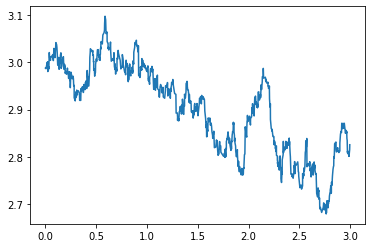

In [73]:
# Test
T = np.random.uniform(low = 0, high = 3, size=1000)
T = np.sort(T)
GBM_mtx_t = GenerateGBMRealization(3,0.01,0.25,T)
print(GBM_mtx_t.shape)
plt.plot(GBM_mtx_t[:,0],GBM_mtx_t[:,1])

**Problem 4 - GBM Calibration**

Calibrating/fitting an SDE model is all about determining what parameters defining that SDE provide a best fit to data.

Calibration of a geometric Brownian motion is somewhat straightforward.
Suppose we get to observe a geometric Brownian motion process at time points in the time interval $[0,T]$

$t_0=0,t_1,t_2,\ldots,t_N=T.$ 

To give an array 

$G_0,G_1,\ldots,G_N$

Since the log of geometric Brownian motion is Brownian motion with drift paramater $\mu$ and volatility parameter $\sigma,$ we can write the successive differences

$$
\log(G_{i+1})-\log(G_i) = \mu (t_{i+1}-t_i) + \sigma \sqrt{t_{i+1}-t_i} \delta_i
$$

where the $\delta_i$ are iid $N(0,1)$ for $i=1,\ldots,N.$
In other words, if we define successive time differences by 

$$
\Delta_i = t_{i+1}-t_i
$$

and define the successive differences of the observed $\log G_t$ by

$$
\Delta\log G_i :=\log(G_{i+1})-\log(G_i) \sim N(\mu \Delta_i,\sigma^2 \Delta_i)
$$
for $i=0,1,\ldots,N-1.$ and these are independent.

Then to calibrate can estimate our parameters using the maximum likelihood giving

$$
\hat{\mu} = {\log G_{t_N} - \log G_{t_0} \over t_N - t_0}
$$

and

$$
\hat{\sigma}=\sqrt{ 
\frac{1}{N}
\sum_{i=0}^{N-1}
{\left(
\Delta \log G_i - \hat{\mu}\Delta t_i
\right)^2
\over \Delta t_i}}
$$

Write a function called **GBMCalibration** that takes as input
an (N+1) x 2 numpy array where the first column is the times $t$ at which a GBM process is observed, and the second column is the values $G_t$ of the GBM observed at those times, and returns a 2-tuple consisting of
$\hat{\mu}$ and $\hat{\sigma}$

In [172]:
def GBMCalibration(M):
    N = M.shape[0] - 1
    u = (np.log(M[-1,1]) - np.log(M[0,1])) / (M[-1,0] - M[0,0])
    sig = np.sqrt((1/N) * np.sum([( (((np.log(M[i+1,1]) - np.log(M[i,1])) - u*(M[i+1,0]-M[i,0]))**2) / (M[i+1,0]-M[i,0]) ) for i in range(N)]))
    return u, sig

**Problem 5 - Testing the GBMCalibration Code**

Write a function called **TestCalibration** that takes 3 arguments 

**G0** = starting point for GBM
**mu** = the drift parameter
**sigma** = the volatility parameter
**MaxT** = largest possible value of time at which GBM could be observed
**N** = number (greater than 2) of times (positive integer)at which GBM samples are observed

Your function should do the following:

- generate a 1-d numpy array of **N-2** times uniformly distributed in the interval **[0,MaxTime]**, adjoin the values **0** and **MaxT** to the array, and sort it in increasing order to give a 1-d array with **N** values, **0** being the miniumum and **MaxT** being the maximum. 

- generate a GBM realization using the parameters **G0**, **mu**, and **sigma** observed at the times in your array of times

- call the GBMCalibration function using those times and observations

and finally return the pair of parameter estimates (**mu**,**sigma**) obtained from the GMBCalibration function.

For large values of N and MaxT, your estimates should resemble the *true* values of **mu** and **sigma**  used to generate the realizations.

In [75]:
def TestGBMCalibration(G0,mu,sigma,MaxT,N):
    T_raw = np.random.uniform(0,MaxT,N-2)
    T_raw = np.concatenate((T_raw, np.array([0,MaxT])))
    T = np.sort(T_raw)
    
    Gt = GenerateGBMRealization(G0,mu,sigma,T)
    return GBMCalibration(Gt)

In [76]:
# Test
print(TestGBMCalibration(1,0.01,0.25,1000,100000))

(0.011957119619002357, 0.21139501561111504)


**Problem 6**

Data giving 

- *daily adjusted closing* prices for the S&P 500 Index for one year, and
- *weekly adjusted closing* prices for the S&P 500 Index for one year

have been provided as comma-delimited files. These files have been downloaded from the Yahoo Finance site.

Write a function called **FitGBMToData** that takes a **single argument**, namely, 

- filepath = path to a data file on disk

Your function should read in the data from one of the files, fit a GBM model using your calibration function and return the pair consisting of fitted values of **mu** and **sigma**.

Your function should work for either of the two data files (and any file that has the same format).

Here, you can take the time unit for your 

**Notes:**

- the data in the files are in reverse chronological order - this needs to be fixed
- there is a line at the end of each file that needs to be ignored
- your function should be able to read either of the file from disk **as they have been given to you i.e. no modifying the file is allowed before it is read** 
- use the "Adj Close" column 
- use a single day as the time unit (even for weekly data)
- make sure you take into account that there are (holiday and weekend) gaps in the days
- you'll need to do some researching to figure out how to get number of days since the first day

In [77]:
def FitGBMToData(filepath):
    df = pd.read_csv(filepath)[["Date","Adj Close**"]]
    # Clean data
    df = df.drop(df.index[-1])
    
    for i in range(len(df["Date"])):
        if len(df.loc[i,"Date"].split('-')[0]) == 1:
            df.loc[i,"Date"] = '0'+df.loc[i,"Date"]
    df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")
    
    df = df.sort_values(by='Date',ascending=True)
    df.reset_index(drop=True, inplace=True)
    
    # Calculate Time array with (len-1) time intervals
    NumDays = (df.iloc[-1,0] - df.iloc[0,0]).days # Number of days
    T = np.zeros(len(df["Date"])-1)
    G = np.zeros(len(df["Date"])-1)
    T[0] = 0
    G[0] = df.iloc[0,1].replace(',','')
    for i in range(1, len(df["Date"])-1):
        T[i] = (df.iloc[i+1,0] - df.iloc[i,0]).days + T[i-1]
        G[i] = df.iloc[i,1].replace(',','')
    G = G.astype(float)
    M = np.stack((T, G),axis = 1)

    # Fit model
    return GBMCalibration(M)

In [78]:
# Test
print(FitGBMToData('SP500Daily.csv'))
print(FitGBMToData('SP500Weekly.csv'))

(0.00020810729569531236, 0.00881730160022227)
(0.0003439897277052631, 0.009813413279867348)


Time Arr in first 10 days: [ 0.  3.  4.  5.  6.  7. 10. 11. 12. 13.]
(0.00021693109523694072, 6.579519351429378e-05)


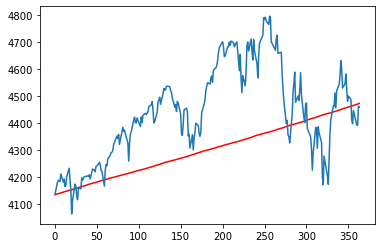

In [79]:
# Test
def showComparison():
    df = pd.read_csv("SP500Daily.csv")[["Date","Adj Close**"]]
    # Clean data
    df = df.drop(df.index[-1])

    for i in range(len(df["Date"])):
        if len(df.loc[i,"Date"].split('-')[0]) == 1:
            df.loc[i,"Date"] = '0'+df.loc[i,"Date"]
    df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")

    df = df.sort_values(by='Date',ascending=True)
    df.reset_index(drop=True, inplace=True)

    # Calculate Time array with (len-1) time intervals
    NumDays = (df.iloc[-1,0] - df.iloc[0,0]).days # Number of days
    Time_stock = np.zeros(len(df["Date"])-1)
    G_stock = np.zeros(len(df["Date"])-1)
    Time_stock[0] = 0
    G_stock[0] = df.iloc[0,1].replace(',','')
    for i in range(1, len(df["Date"])-1):
        Time_stock[i] = (df.iloc[i+1,0] - df.iloc[i,0]).days + Time_stock[i-1]
        G_stock[i] = df.iloc[i,1].replace(',','')
    G_stock = G_stock.astype(float)
    M_stock = np.stack((Time_stock, G_stock),axis = 1)
    Stock_modeled = GenerateGBMRealization(4134.98, 0.000208, 0.008,Time_stock)
    #Stock_modeled = GenerateGBMRealization(2348.69, 0.0003439897, 0.0098,Time_stock)
    print("Time Arr in first 10 days:",Time_stock[0:10])
    print(GBMCalibration(Stock_modeled))

    plt.plot(Stock_modeled[:,0],Stock_modeled[:,1], 'r')
    plt.plot(Time_stock,G_stock)

showComparison()

**Problem 7 - Parametric Bootstrap Confidence Intervals**

The GBM model is an example of a *parametric model*. We have a method for estimating the parameters of that model from data. How confident can we be about our estimates? We are sampling a process, and this leads to uncertainty since we only have one realization to use for estimation. 

One way to address this question is using the **parametric bootstrap**.  Once we have our parameter estimates, we pretend that these are the true values. Then we can generate several realizations, fixing the following

- **G0** - the starting value at the value for the actual data
- **mu** - the estimated drift parameter for the actual data
- **sigma** - the estimated volatility parameter for the actual data
- **T** - the vector of times at which we observe the process for the actual data.

For each realization, we can estimate the parameters **mu** and **sigma**.

If we do this **N** times we get 

$$\hat{\mu}_1,\hat{\mu}_2,\ldots,\hat{\mu}_N$$
$$\hat{\sigma}_1,\hat{\sigma}_2,\ldots,\hat{\sigma}_N$$

and these provide some indication of the inherent *sampling variation* we should have anticipated in our actual estimates.

A 95% bootstrap confidence confidence interval for $\mu$ is gotten from the 2.5% and 97.5% sample percentiles
of the $\hat{\mu}_i,i=1,\ldots,N.$ Denoting these quantiles by $q_{.025}(\hat{\mu})$ and 
$q_{.975}(\hat{\mu})$ we can take our confidence interval for $\mu$ to be
$$[q_{.025}(\hat{\mu}),q_{.975}(\hat{\mu})].$$

Write a function called **GBMBootstrapCI** that takes as inputs the following

- **G0** - the starting value at the value for the actual data
- **mu** - the estimated drift parameter for the actual data
- **sigma** - the estimated volatility parameter for the actual data
- **T** - the vector of times at which we observe the process for the actual data, and
- **N** - the number of bootstrap trials/the bootstrap sample size

Your function should do the following for i=0,...,N-1:

- generate a realization of GBM using the input values of G0, mu, sigma and T using your **GenerateGBMRealization** function
- calibrate the model using the **GBMCalibration** function to get $\hat{\mu}_i$ and $\hat{\sigma}_i$

and your output should be a 4-tuple consisting of

- **$q_{.025}(\hat{\mu})$**
- **$q_{.975}(\hat{\mu})$**
- **$q_{.025}(\hat{\sigma})$**
- **$q_{.975}(\hat{\sigma})$**

In [80]:
def GBMBootstrapCI(G0,mu,sigma,T,N):
    u_arr= np.zeros(N)
    sig_arr = np.zeros(N)
    for i in range(N):
        Temp_M = GenerateGBMRealization(G0, mu, sigma, T)
        u_arr[i], sig_arr[i] = GBMCalibration(Temp_M)
        
    u_arr = np.sort(u_arr)
    sig_arr = np.sort(sig_arr)
    return np.quantile(u_arr, .025), np.quantile(u_arr, .975), np.quantile(sig_arr, .025), np.quantile(sig_arr, .975)

**Problem 8** 

Run your **FitGBMToData** on the actual daily data to get parameter estimates and use your **GBMBootstrapCI** function to get a confidence interval for **sigma** based on a bootstrap sample size of N=1000. In the cell below, assign **literal** values of the left and right endpoints (also referred to as lower and upper confidence interval endpoints) of the interval you obtain.

Reminder - **literal** means the right hand side of the assignment should be a number and should not involve any  functions or arithmetic operations

In [86]:
# Test
def getTBoot(filepath):
    df = pd.read_csv(filepath)[["Date","Adj Close**"]]
    # Clean data
    df = df.drop(df.index[-1])
    
    for i in range(len(df["Date"])):
        if len(df.loc[i,"Date"].split('-')[0]) == 1:
            df.loc[i,"Date"] = '0'+df.loc[i,"Date"]
    df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")
    
    df = df.sort_values(by='Date',ascending=True)
    df.reset_index(drop=True, inplace=True)
    
    # Calculate Time array with (len-1) time intervals
    NumDays = (df.iloc[-1,0] - df.iloc[0,0]).days # Number of days
    T = np.zeros(len(df["Date"])-1)
    G = np.zeros(len(df["Date"])-1)
    T[0] = 0
    for i in range(1, len(df["Date"])-1):
        T[i] = (df.iloc[i+1,0] - df.iloc[i,0]).days + T[i-1]
    print("Time",T[0:15])
    return float(df.iloc[0,1].replace(",",'')), T

fit_u, fig_sig = FitGBMToData('SP500Daily.csv')
print(f"FitGBMToData: \n    mu = {fit_u} \n    sigma = {fig_sig}")
u_q025, u_q975, sig_q025, sig_q975 = GBMBootstrapCI(getTBoot('SP500Daily.csv')[0], fit_u, fig_sig, getTBoot('SP500Daily.csv')[1], 1000)
print(f"GBMBootstrapCI: \n    mu = [{u_q025}, {u_q975}]")
print(f"GBMBootstrapCI: \n    sigma = [{sig_q025}, {sig_q975}]")



FitGBMToData: 
    mu = 0.00020810729569531236 
    sigma = 0.00881730160022227
Time [ 0.  3.  4.  5.  6.  7. 10. 11. 12. 13. 14. 17. 18. 19. 20.]
Time [ 0.  3.  4.  5.  6.  7. 10. 11. 12. 13. 14. 17. 18. 19. 20.]
GBMBootstrapCI: 
    mu = [0.00020273072077072656, 0.00021772782614402173]
GBMBootstrapCI: 
    sigma = [7.851818257637994e-05, 9.75998206632673e-05]


In [87]:
sigma_lower_CI_endpoint=sig_q025
sigma_upper_CI_endpoint=sig_q975

## Yahoo Finance

In [88]:
import yfinance as yf

In [150]:
# Test on Nvidia from 2020-04 to 2022-04
nvda = yf.Ticker("nvda")
nvda_historical = nvda.history(start="2020-05-01", end="2022-04-28", interval="1h")
# Reset index to create a column for Date (Date was originally used for indexing)
nvda_historical = nvda_historical.reset_index()
nvda_historical.rename(columns={'index': 'Date'}, inplace=True, errors='raise')
# Filter for Date, Close
nvda_historical = nvda_historical[["Date", "Close"]]
print(nvda_historical.shape)
print(nvda_historical.head())

(3505, 2)
                       Date      Close
0 2020-05-01 09:30:00-04:00  71.125000
1 2020-05-01 10:30:00-04:00  70.952499
2 2020-05-01 11:30:00-04:00  70.480003
3 2020-05-01 12:30:00-04:00  70.562675
4 2020-05-01 13:30:00-04:00  71.092499


In [162]:
# Create np array for Time, Close
NVDA = np.zeros([3505 - 1,2])
NVDA[0,1] = nvda_historical.iloc[0,1]
for i in range(1, len(nvda_historical["Date"])-1):
    NVDA[i,0] = (nvda_historical.iloc[i+1,0] - nvda_historical.iloc[i,0]).seconds//3600 + NVDA[i-1,0]
    NVDA[i,1] = nvda_historical.iloc[i,1]
print(NVDA)
NVDA = np.delete(NVDA, -1, axis = 0)
print(NVDA[-1,:])

[[0.00000000e+00 7.11250000e+01]
 [1.00000000e+00 7.09524994e+01]
 [2.00000000e+00 7.04800034e+01]
 ...
 [1.20250000e+04 1.86639999e+02]
 [1.20260000e+04 1.84369995e+02]
 [1.20260000e+04 1.84169998e+02]]
[12026.           184.36999512]


7.920386572027568e-05 0.010777602598421001
(8.193162555889807e-05, 0.00022059889329453222)


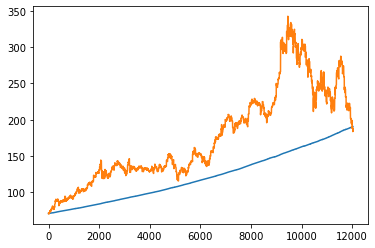

In [173]:
# Test GBM
nvda_mu, nvda_sigma = GBMCalibration(NVDA)
print(nvda_mu, nvda_sigma)
nvda_model = GenerateGBMRealization(71.125,nvda_mu,nvda_sigma,NVDA[:,0])
print(GBMCalibration(nvda_model))
plt.plot(nvda_model[:,0],nvda_model[:,1])
plt.plot(nvda_model[:,0],nvda_historical.iloc[:-2,1])